# Import necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Importing essential libraries for data manipulation, scaling, and building AdaBoost and decision tree models.

# Load the Dataset

In [13]:
# Load the dataset from Excel
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data" # Replace with your actual file path
data = pd.read_csv(file_path)
# Check the first 5 rows of the dataset
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Loading the breast cancer dataset from a CSV file available at a URL into a pandas DataFrame.

# Display the first 5 and last 5 rows, shape, and basic info of the dataset

In [15]:
 data.tail() 

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [17]:
 {data.shape}

{(568, 32)}

In [19]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [21]:
data.describe()


,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
842302,568.0,3.042382e+07,1.251246e+08,8670.000000,869222.500000,906157.000000,8.825022e+06,9.113205e+08
17.99,568.0,1.412049e+01,3.523416e+00,6.981000,11.697500,13.355000,1.578000e+01,2.811000e+01
10.38,568.0,1.930533e+01,4.288506e+00,9.710000,16.177500,18.855000,2.180250e+01,3.928000e+01
122.8,568.0,9.191475e+01,2.428585e+01,43.790000,75.135000,86.210000,1.038750e+02,1.885000e+02
1001,568.0,6.542798e+02,3.519238e+02,143.500000,420.175000,548.750000,7.826250e+02,2.501000e+03
0.1184,568.0,9.632148e-02,1.404601e-02,0.052630,0.086290,0.095865,1.053000e-01,1.634000e-01
0.2776,568.0,1.040360e-01,5.235523e-02,0.019380,0.064815,0.092525,1.304000e-01,3.454000e-01
0.3001,568.0,8.842731e-02,7.929422e-02,0.000000,0.029540,0.061400,1.296500e-01,4.268000e-01
0.1471,568.0,4.874629e-02,3.861717e-02,0.000000,0.020310,0.033455,7.373000e-02,2.012000e-01
0.2419,568.0,1.810549e-01,2.731942e-02,0.106000,0.161900,0.179200,1.956250e-01,3.040000e-01


Printing the first and last five rows, dataset shape, info (data types, non-null values), and a statistical summary of the dataset.

# Check for duplicate rows

In [26]:
# Check for duplicate rows
num_total_rows = len(data) 
num_duplicate_rows = data.duplicated().sum() 
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") 
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


Checking for duplicate rows and calculating the percentage of duplicated rows in the dataset.

# Count unique values for each column

In [29]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

842302      568
M             2
17.99       456
10.38       478
122.8       521
1001        538
0.1184      473
0.2776      536
0.3001      536
0.1471      542
0.2419      431
0.07871     498
1.095       539
0.9053      518
8.589       532
153.4       527
0.006399    547
0.04904     540
0.05373     532
0.01587     506
0.03003     497
0.006193    544
25.38       456
17.33       510
184.6       514
2019        543
0.1622      410
0.6656      528
0.7119      538
0.2654      491
0.4601      499
0.1189      534
dtype: int64


Counting and displaying the number of unique values in each column to better understand categorical and continuous variables.

# Drop non-numeric columns (e.g., 'id')

In [32]:
data.drop('842302', axis=1, inplace=True)

In [34]:
print(data.columns)

Index(['M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001',
       '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4',
       '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193',
       '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119',
       '0.2654', '0.4601', '0.1189'],
      dtype='object')


Dropping the 'id' column (if present) since it is not needed for model training.

# Check for Missing Values

In [37]:
# Check for Missing Values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64


Checking for missing values in each column of the dataset.

# Handle Missing Values: Filling missing values only in numeric columns

In [40]:
# Handle Missing Values: Filling missing values with the mean for numeric columns only
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

Handling missing values in numeric columns by filling them with the mean of each column.

# Encode Labels: Encoding 'diagnosis' column (1 for Malignant, 0 for Benign)

In [43]:
# Encode Labels: Encoding 'diagnosis' column (1 for Malignant, 0 for Benign)
data['M'] = data['M'].map({'M': 1, 'B': 0})

Encoding the 'diagnosis' column to 1 for malignant (M) and 0 for benign (B) cases for model training.

# Separate Features and Target Variable

In [46]:
# Separate Features and Target Variable
X = data.drop(columns=['M'])  # Features
y = data['M']  # Target variable

Separating the dataset into features (X) and the target variable (y).

# Scale Features using StandardScaler

In [49]:
# Scale Features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardizing the feature columns using StandardScaler to give each feature a mean of 0 and variance of 1.

# Display Data: Display the first few rows of the scaled features

In [52]:
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

      17.99     10.38     122.8      1001    0.1184    0.2776    0.3001  \
0  1.832084 -0.358327  1.689106  1.910392 -0.825266 -0.485498 -0.019278   
1  1.582106  0.453860  1.569590  1.560576  0.946192  1.067960  1.375494   
2 -0.767117  0.250813 -0.590772 -0.762711  3.290559  3.438483  1.930879   
3  1.752545 -1.158844  1.779774  1.827915  0.283499  0.549886  1.383068   
4 -0.474529 -0.841438 -0.385121 -0.503904  2.243076  1.261043  0.875648   

     0.1471    0.2419   0.07871  ...     25.38     17.33     184.6      2019  \
0  0.555261  0.005315 -0.867817  ...  1.813349 -0.371875  1.545063  1.899054   
1  2.051509  0.946867 -0.395465  ...  1.518626 -0.026387  1.356695  1.463694   
2  1.463170  2.881262  4.932714  ... -0.278773  0.131690 -0.246823 -0.547953   
3  1.439844 -0.005676 -0.560504  ...  1.304847 -1.470265  1.347725  1.227507   
4  0.833102  1.012812  1.900845  ... -0.162544 -0.316467 -0.111378 -0.241438   

     0.1622    0.6656    0.7119    0.2654    0.4601    0.1189  
0 -0

Displaying the first few rows of the scaled features after applying StandardScaler.

# Visualize the count of Benign vs Malignant cases

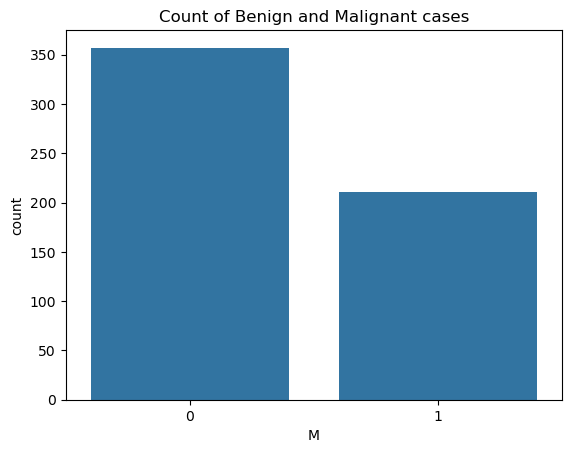

In [60]:
sns.countplot(x='M', data=data)
plt.title('Count of Benign and Malignant cases')
plt.show()

Creating a count plot to visualize the distribution of benign and malignant cases in the dataset.

# Correlation heatmap

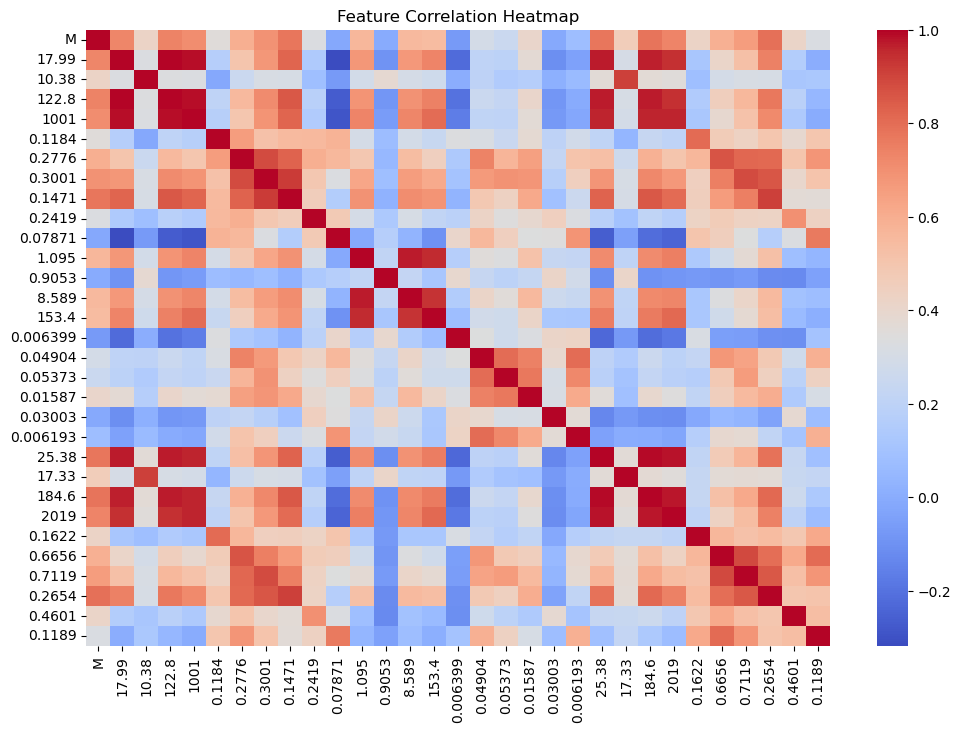

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Creating a heatmap to visualize the correlation between different features of the dataset.